# How to Use K-Nearest Neighbors (KNN)

Through this example, we will create a training set and use it to find the K-nearest neighbors regression function. First, we generate a training set of $N=1000$ points $\{(x_n,y_n)\}_{n=1}^N$ where $x_n$ is independent and uniformly distributed in the interval of $[0,a]$ (we will set $a=2$ here) and $y_n=2x_n+sin(2\pi{x_n})+\epsilon_n$ for $\epsilon_n$ are independent and normally distributed with mean $0$ and standard deviation of $\sigma=1$ which is noise level.

In [4]:
#import the packages required for graphs and numpy array tool
from matplotlib import pyplot as plt
import numpy as np

#define N and sigma(standard deviation) value as mentioned above
N = 1000
sigma = 1 #noise level
a = 2 #value of a determining the interval of x

#define training set value of x,y, and epsilon
x_train = a*np.random.rand(N) #N times of random selection from uniform distribution in [0,a]
eps = np.random.normal(0, sigma, N) #N times of random selection of epsilon value normally distributed with mean 0
y_train = 2*x_train + np.sin(2*np.pi*x_train) + eps; #N values of y using the equation above

We will plot the training set in green and the theoretical regression function in blue.

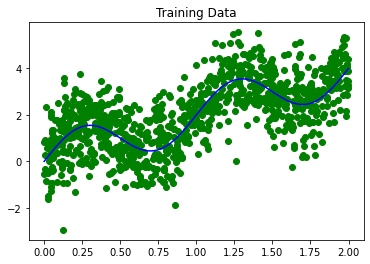

In [7]:
x = np.linspace(0, a, 100) #This returns evenly spaced numbers of x over [0,a]
y = 2*x + np.sin(2*np.pi*x) 

#Plot the scatter plot of training data with theoretical regression function
figure, axis = plt.subplots()
axis.set_title('Training Data')
plt.scatter(x_train,y_train, c='g')
plt.plot(x, y, c='b')
plt.show()

Then, we will use the sklearn package to find the K-nearest neighbor regression function. Then, we will plot the theoretical regression function and the K-nearest neighbor regression function in red. By freely changing the parameter $K$, we can see how the nearest neighbor regression function changes and suffere from such issues as over-fitting.

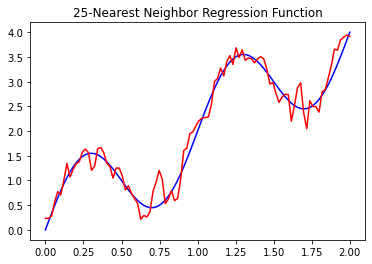

In [13]:
from sklearn.neighbors import KNeighborsRegressor

K = 25 #by changing this parameter, we can change the K-nearest neighbor regression function

#define the model as K-Nearest Neighbors and fit it into our training set
model = KNeighborsRegressor(n_neighbors = K)
model.fit(x_train.reshape(-1, 1), y_train)


y_predicted = model.predict(x.reshape(-1,1))

figure, axis = plt.subplots()
axis.set_title('{}-Nearest Neighbor Regression Function'.format(K))
plt.plot(x, y, c='b')
axis.plot(x, y_predicted, 'r')
plt.show()